# Trade Call Prediction Using Classification #

# Problem 4.1 #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC , GradientBoostingClassifier as GBC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
hero_moto=pd.read_csv('HEROMOTOCO.csv')
hero_moto=hero_moto[hero_moto['Series']=='EQ']
hero_moto.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HEROMOTOCO,EQ,15-May-2017,3541.50,3541.0,3558.00,3504.60,3518.0,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38
1,HEROMOTOCO,EQ,16-May-2017,3515.45,3529.5,3631.80,3491.10,3623.0,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64
2,HEROMOTOCO,EQ,17-May-2017,3619.40,3615.0,3683.95,3595.05,3634.1,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54
3,HEROMOTOCO,EQ,18-May-2017,3645.95,3600.0,3639.00,3577.05,3586.0,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78
4,HEROMOTOCO,EQ,19-May-2017,3592.05,3597.0,3656.00,3533.75,3565.0,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86


In [3]:
hero_moto.Date=pd.to_datetime(hero_moto['Date'])
hero_moto.set_index(hero_moto['Date'],inplace=True)
hero_moto

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38
2017-05-16,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64
2017-05-17,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54
2017-05-18,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78
2017-05-19,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35
2019-05-08,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45
2019-05-09,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69


In [4]:
hero_moto['Mid_bollinger']=hero_moto['Close Price'].rolling(14).mean()
std_dev=hero_moto['Close Price'].std()
hero_moto['Lower_bollinger']=hero_moto['Mid_bollinger'] - 2 * std_dev
hero_moto['Upper_bollinger']=hero_moto['Mid_bollinger'] + 2 * std_dev
hero_moto

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Mid_bollinger,Lower_bollinger,Upper_bollinger
Date,,,,,,,,,,,,,,,,,,
2017-05-15,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,NaN,NaN,NaN
2017-05-16,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,NaN,NaN,NaN
2017-05-17,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,NaN,NaN,NaN
2017-05-18,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,NaN,NaN,NaN
2017-05-19,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,2618.935714,1772.919920,3464.951509
2019-05-08,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,2608.921429,1762.905634,3454.937223
2019-05-09,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,2597.282143,1751.266348,3443.297938


In [5]:
hero_moto.isnull().sum()

Symbol                     0
Series                     0
Date                       0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
Mid_bollinger             13
Lower_bollinger           13
Upper_bollinger           13
dtype: int64

In [6]:
hero_moto.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
Mid_bollinger                    float64
Lower_bollinger                  float64
Upper_bollinger                  float64
dtype: object

In [7]:
hero_moto['Mid_bollinger'].fillna(hero_moto['Mid_bollinger'].median(),inplace=True)
hero_moto['Lower_bollinger'].fillna(hero_moto['Lower_bollinger'].median(),inplace=True)
hero_moto['Upper_bollinger'].fillna(hero_moto['Upper_bollinger'].median(),inplace=True)
hero_moto

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Mid_bollinger,Lower_bollinger,Upper_bollinger
Date,,,,,,,,,,,,,,,,,,
2017-05-15,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,3565.828571,2719.812777,4411.844366
2017-05-16,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,3565.828571,2719.812777,4411.844366
2017-05-17,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,3565.828571,2719.812777,4411.844366
2017-05-18,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,3565.828571,2719.812777,4411.844366
2017-05-19,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,3565.828571,2719.812777,4411.844366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,2618.935714,1772.919920,3464.951509
2019-05-08,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,2608.921429,1762.905634,3454.937223
2019-05-09,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,2597.282143,1751.266348,3443.297938


conditions=[(hero_moto['Close Price'] < hero_moto['Lower_bollinger']) ,
            ( hero_moto['Close Price'] < hero_moto['Mid_bollinger'] and hero_moto['Close Price'] > hero_moto['Lower_bollinger']) , 
            (hero_moto['Close Price'] < hero_moto['Upper_bollinger'] and hero_moto['Close Price'] > hero_moto['Mid_bollinger']),
            (hero_moto['Close Price'] > hero_moto['Upper_bollinger'])]
values=['Buy' , 'Hold Buy/Liquidate Short' , 'Hold Short/Liquidate Buy' , 'Short']
hero_moto['Call'] = np.select(conditions , values)

In [8]:
def call(hero_moto):
    if hero_moto['Close Price'] < hero_moto['Lower_bollinger']:
        return "Buy"
    if hero_moto['Close Price'] > hero_moto['Lower_bollinger'] and hero_moto['Close Price'] < hero_moto['Mid_bollinger']:
        return "Hold Buy/Liquidate Short"
    if hero_moto['Close Price'] > hero_moto['Mid_bollinger'] and hero_moto['Close Price'] < hero_moto['Upper_bollinger']:
        return "Hold Short/Liquidate Buy"
    if hero_moto['Close Price'] > hero_moto['Upper_bollinger']:
        return "Short"
hero_moto_2 = hero_moto.assign(Call = hero_moto.apply(call, axis=1)).copy()
hero_moto_2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Mid_bollinger,Lower_bollinger,Upper_bollinger,Call
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,3565.828571,2719.812777,4411.844366,Hold Buy/Liquidate Short
2017-05-16,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy
2017-05-17,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy
2017-05-18,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy
2017-05-19,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,2618.935714,1772.919920,3464.951509,Hold Buy/Liquidate Short
2019-05-08,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,2608.921429,1762.905634,3454.937223,Hold Buy/Liquidate Short
2019-05-09,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,2597.282143,1751.266348,3443.297938,Hold Buy/Liquidate Short


In [9]:
# Call variable are categorical features so converting them into Numerical Features
from sklearn.preprocessing import LabelEncoder
from collections import Counter
hero_moto_2['Call_label_encoded']=LabelEncoder().fit_transform(hero_moto_2[['Call']]).reshape(-1,1)
Counter(hero_moto_2['Call_label_encoded'])

c:\users\ramesh patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Counter({0: 277, 1: 217})

In [10]:
hero_moto_2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Mid_bollinger,Lower_bollinger,Upper_bollinger,Call,Call_label_encoded
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,3565.828571,2719.812777,4411.844366,Hold Buy/Liquidate Short,0
2017-05-16,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy,1
2017-05-17,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy,1
2017-05-18,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy,1
2017-05-19,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,3565.828571,2719.812777,4411.844366,Hold Short/Liquidate Buy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,2618.935714,1772.919920,3464.951509,Hold Buy/Liquidate Short,0
2019-05-08,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,2608.921429,1762.905634,3454.937223,Hold Buy/Liquidate Short,0
2019-05-09,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,2597.282143,1751.266348,3443.297938,Hold Buy/Liquidate Short,0


In [11]:
# MAking Train and Target Data
X = hero_moto_2[['Upper_bollinger','Lower_bollinger','Mid_bollinger','Close Price']]
y= hero_moto_2['Call']

In [12]:
# Splitting data as train and test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

**1.Logistic Regression**

In [13]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
accuracy_score(y_pred_logreg , y_test)

1.0

**2.Decision Tree Classifier**

In [14]:
dtc=DTC().fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
accuracy_score(y_pred_dtc,y_test)

0.9292929292929293

**3.K Nearest Neighbours**

In [15]:
knn=KNN(n_neighbors=6).fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(y_pred_knn,y_test)

0.9292929292929293

In [16]:
knn=KNN(n_neighbors=5).fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(y_pred_knn,y_test)

0.9090909090909091

In [17]:
# n_neighbors=7
knn=KNN(n_neighbors=7).fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(y_pred_knn,y_test)

0.9393939393939394

**4. Support Vector Machines**

In [18]:
svc=SVC(kernel='linear').fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
accuracy_score(y_pred_svc,y_test)

1.0

**5. Naive Bayes**

In [19]:
gnb=GaussianNB().fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
accuracy_score(y_pred_gnb , y_test)

0.41414141414141414

**6.Random forest Classifier**

In [20]:
rfc=RFC().fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)

0.9595959595959596

**So , Implementated 6 Classification algorithms and found that every algorithm worked well excluding Naive Bayes (GaussianNB)**

### Now Importing other Data and predicting the calls for that using already trained models

In [21]:
itc=pd.read_csv('ITC.csv')
itc=itc[itc['Series']=='EQ']
itc.Date=pd.to_datetime(itc['Date'])
itc.set_index(itc['Date'],inplace=True)
itc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,2017-05-15,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
2017-05-16,ITC,EQ,2017-05-16,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2017-05-17,ITC,EQ,2017-05-17,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
2017-05-18,ITC,EQ,2017-05-18,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
2017-05-19,ITC,EQ,2017-05-19,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITC,EQ,2019-05-07,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
2019-05-08,ITC,EQ,2019-05-08,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
2019-05-09,ITC,EQ,2019-05-09,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35


In [22]:
itc['Mid_bollinger']=itc['Close Price'].rolling(14).mean()
std_dev=itc['Close Price'].std()
itc['Lower_bollinger']=itc['Mid_bollinger'] - 2 * std_dev
itc['Upper_bollinger']=itc['Mid_bollinger'] + 2 * std_dev
itc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Mid_bollinger,Lower_bollinger,Upper_bollinger
Date,,,,,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,2017-05-15,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57,NaN,NaN,NaN
2017-05-16,ITC,EQ,2017-05-16,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15,NaN,NaN,NaN
2017-05-17,ITC,EQ,2017-05-17,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40,NaN,NaN,NaN
2017-05-18,ITC,EQ,2017-05-18,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58,NaN,NaN,NaN
2017-05-19,ITC,EQ,2017-05-19,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITC,EQ,2019-05-07,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65,304.478571,269.052260,339.904883
2019-05-08,ITC,EQ,2019-05-08,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52,304.114286,268.687975,339.540597
2019-05-09,ITC,EQ,2019-05-09,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35,303.710714,268.284403,339.137025


In [23]:
itc['Mid_bollinger'].fillna(itc['Mid_bollinger'].median(),inplace=True)
itc['Lower_bollinger'].fillna(itc['Lower_bollinger'].median(),inplace=True)
itc['Upper_bollinger'].fillna(itc['Upper_bollinger'].median(),inplace=True)
itc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Mid_bollinger,Lower_bollinger,Upper_bollinger
Date,,,,,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,2017-05-15,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57,278.628571,243.202260,314.054883
2017-05-16,ITC,EQ,2017-05-16,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15,278.628571,243.202260,314.054883
2017-05-17,ITC,EQ,2017-05-17,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40,278.628571,243.202260,314.054883
2017-05-18,ITC,EQ,2017-05-18,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58,278.628571,243.202260,314.054883
2017-05-19,ITC,EQ,2017-05-19,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57,278.628571,243.202260,314.054883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITC,EQ,2019-05-07,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65,304.478571,269.052260,339.904883
2019-05-08,ITC,EQ,2019-05-08,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52,304.114286,268.687975,339.540597
2019-05-09,ITC,EQ,2019-05-09,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35,303.710714,268.284403,339.137025


In [24]:
itc_train=itc[['Upper_bollinger','Lower_bollinger','Mid_bollinger','Close Price']]
itc['Call_svc']=svc.predict(itc_train)
Counter(itc['Call_svc'])

Counter({'Hold Buy/Liquidate Short': 394, 'Hold Short/Liquidate Buy': 100})

In [25]:
itc_train=itc[['Upper_bollinger','Lower_bollinger','Mid_bollinger','Close Price']]
itc['Call_DTC']=dtc.predict(itc_train)
Counter(itc['Call_DTC'])

Counter({'Hold Buy/Liquidate Short': 494})

In [26]:
itc_train=itc[['Upper_bollinger','Lower_bollinger','Mid_bollinger','Close Price']]
itc['Call_rfc']=rfc.predict(itc_train)
Counter(itc['Call_rfc'])

Counter({'Hold Buy/Liquidate Short': 494})

In [27]:
itc_train=itc[['Upper_bollinger','Lower_bollinger','Mid_bollinger','Close Price']]
itc['Call_logreg']=logreg.predict(itc_train)
Counter(itc['Call_logreg'])

Counter({'Hold Buy/Liquidate Short': 237, 'Hold Short/Liquidate Buy': 257})

# Problem 4.2 #

In [28]:
# importing Axis Bank Stock dataset
axis=pd.read_csv('AXISBANK.csv')
axis=axis[axis['Series']=='EQ']
axis.Date=pd.to_datetime(axis['Date'])
axis

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,2017-05-15,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,2017-05-16,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,4.303938e+09,101028,4027982,46.78
2,AXISBANK,EQ,2017-05-17,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,3.240154e+09,84189,2876528,44.64
3,AXISBANK,EQ,2017-05-18,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,4.566993e+09,95624,5348691,57.97
4,AXISBANK,EQ,2017-05-19,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,3.798900e+09,72985,4190505,55.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,AXISBANK,EQ,2019-05-07,747.45,751.85,755.50,740.00,744.85,741.85,748.48,5071941,3.796226e+09,141094,2404026,47.40
491,AXISBANK,EQ,2019-05-08,741.85,741.90,744.75,733.35,735.10,735.50,737.58,6739894,4.971211e+09,118950,3373685,50.06
492,AXISBANK,EQ,2019-05-09,735.50,733.90,740.50,729.40,732.35,731.00,734.60,4193451,3.080497e+09,75621,1409191,33.60
493,AXISBANK,EQ,2019-05-10,731.00,734.40,738.50,729.50,732.55,735.05,735.71,3913815,2.879428e+09,114875,1569735,40.11


In [29]:
axis['pct_change_open_close']=(axis['Close Price'] - axis['Open Price'])*100/(axis['Open Price'])
axis['pct_change_low_high']=(axis['High Price'] - axis['Low Price'])*100/(axis['Low Price'])
axis['mm5_close']=axis['Close Price'].pct_change().rolling(5).mean()
axis['std5_close']=axis['Close Price'].pct_change().rolling(5).std()
axis

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pct_change_open_close,pct_change_low_high,mm5_close,std5_close
0,AXISBANK,EQ,2017-05-15,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,4.429384e+09,109965,4320438,49.06,-0.970297,2.026485,NaN,NaN
1,AXISBANK,EQ,2017-05-16,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,4.303938e+09,101028,4027982,46.78,-0.119498,2.228977,NaN,NaN
2,AXISBANK,EQ,2017-05-17,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,3.240154e+09,84189,2876528,44.64,0.289219,1.654965,NaN,NaN
3,AXISBANK,EQ,2017-05-18,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,4.566993e+09,95624,5348691,57.97,-1.204819,1.805201,NaN,NaN
4,AXISBANK,EQ,2017-05-19,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,3.798900e+09,72985,4190505,55.06,1.200202,1.952651,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,AXISBANK,EQ,2019-05-07,747.45,751.85,755.50,740.00,744.85,741.85,748.48,5071941,3.796226e+09,141094,2404026,47.40,-1.330053,2.094595,-0.004736,0.012223
491,AXISBANK,EQ,2019-05-08,741.85,741.90,744.75,733.35,735.10,735.50,737.58,6739894,4.971211e+09,118950,3373685,50.06,-0.862650,1.554510,-0.008278,0.009445
492,AXISBANK,EQ,2019-05-09,735.50,733.90,740.50,729.40,732.35,731.00,734.60,4193451,3.080497e+09,75621,1409191,33.60,-0.395149,1.521799,-0.005719,0.007344
493,AXISBANK,EQ,2019-05-10,731.00,734.40,738.50,729.50,732.55,735.05,735.71,3913815,2.879428e+09,114875,1569735,40.11,0.088508,1.233722,-0.005927,0.006911


In [30]:
axis.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
pct_change_open_close     0
pct_change_low_high       0
mm5_close                 5
std5_close                5
dtype: int64

In [31]:
axis['mm5_close'].fillna(axis['mm5_close'].median() ,inplace=True)
axis['std5_close'].fillna(axis['std5_close'].median() ,inplace=True)
axis

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pct_change_open_close,pct_change_low_high,mm5_close,std5_close
0,AXISBANK,EQ,2017-05-15,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,4.429384e+09,109965,4320438,49.06,-0.970297,2.026485,0.000844,0.013630
1,AXISBANK,EQ,2017-05-16,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,4.303938e+09,101028,4027982,46.78,-0.119498,2.228977,0.000844,0.013630
2,AXISBANK,EQ,2017-05-17,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,3.240154e+09,84189,2876528,44.64,0.289219,1.654965,0.000844,0.013630
3,AXISBANK,EQ,2017-05-18,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,4.566993e+09,95624,5348691,57.97,-1.204819,1.805201,0.000844,0.013630
4,AXISBANK,EQ,2017-05-19,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,3.798900e+09,72985,4190505,55.06,1.200202,1.952651,0.000844,0.013630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,AXISBANK,EQ,2019-05-07,747.45,751.85,755.50,740.00,744.85,741.85,748.48,5071941,3.796226e+09,141094,2404026,47.40,-1.330053,2.094595,-0.004736,0.012223
491,AXISBANK,EQ,2019-05-08,741.85,741.90,744.75,733.35,735.10,735.50,737.58,6739894,4.971211e+09,118950,3373685,50.06,-0.862650,1.554510,-0.008278,0.009445
492,AXISBANK,EQ,2019-05-09,735.50,733.90,740.50,729.40,732.35,731.00,734.60,4193451,3.080497e+09,75621,1409191,33.60,-0.395149,1.521799,-0.005719,0.007344
493,AXISBANK,EQ,2019-05-10,731.00,734.40,738.50,729.50,732.55,735.05,735.71,3913815,2.879428e+09,114875,1569735,40.11,0.088508,1.233722,-0.005927,0.006911


In [32]:
axis['Action']=np.zeros(shape=(494))
for i in range(493):
    if(axis.iloc[i+1 , 8]>axis.iloc[i,8]):
        axis.iloc[i,19]=1
    if(axis.iloc[i+1 , 8]<axis.iloc[i,8]):
        axis.iloc[i,19]=-1
    else :
        axis.iloc[i,19]='nan'
axis['Action'].replace({"nan":axis['Action'].median()},inplace=True)
axis

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pct_change_open_close,pct_change_low_high,mm5_close,std5_close,Action
0,AXISBANK,EQ,2017-05-15,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,4.429384e+09,109965,4320438,49.06,-0.970297,2.026485,0.000844,0.013630,-1.0
1,AXISBANK,EQ,2017-05-16,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,4.303938e+09,101028,4027982,46.78,-0.119498,2.228977,0.000844,0.013630,-1.0
2,AXISBANK,EQ,2017-05-17,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,3.240154e+09,84189,2876528,44.64,0.289219,1.654965,0.000844,0.013630,-1.0
3,AXISBANK,EQ,2017-05-18,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,4.566993e+09,95624,5348691,57.97,-1.204819,1.805201,0.000844,0.013630,-1.0
4,AXISBANK,EQ,2017-05-19,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,3.798900e+09,72985,4190505,55.06,1.200202,1.952651,0.000844,0.013630,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,AXISBANK,EQ,2019-05-07,747.45,751.85,755.50,740.00,744.85,741.85,748.48,5071941,3.796226e+09,141094,2404026,47.40,-1.330053,2.094595,-0.004736,0.012223,-1.0
491,AXISBANK,EQ,2019-05-08,741.85,741.90,744.75,733.35,735.10,735.50,737.58,6739894,4.971211e+09,118950,3373685,50.06,-0.862650,1.554510,-0.008278,0.009445,-1.0
492,AXISBANK,EQ,2019-05-09,735.50,733.90,740.50,729.40,732.35,731.00,734.60,4193451,3.080497e+09,75621,1409191,33.60,-0.395149,1.521799,-0.005719,0.007344,-1.0
493,AXISBANK,EQ,2019-05-10,731.00,734.40,738.50,729.50,732.55,735.05,735.71,3913815,2.879428e+09,114875,1569735,40.11,0.088508,1.233722,-0.005927,0.006911,-1.0


In [33]:
axis.iloc[:,8]

0      500.10
1      501.50
2      502.80
3      492.00
4      501.70
        ...  
490    741.85
491    735.50
492    731.00
493    735.05
494    732.10
Name: Close Price, Length: 494, dtype: float64

In [34]:
X2=axis.iloc[0:494,15:19]
y2=axis.iloc[0:494,19]
X2_train,X2_test , y2_train , y2_test = train_test_split(X2,y2, test_size=0.20 , random_state=42)        

In [35]:
from sklearn.model_selection import GridSearchCV as GSCV
params={"n_estimators": np.arange(20,100,20)}
grid=GSCV(estimator=RFC() , param_grid=params)
grid.fit(X2_train,y2_train)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

c:\users\ramesh patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.9974683544303797
20


In [36]:
rfc=RFC(n_estimators=20).fit(X2_train,y2_train)
y2_pred_rfc=rfc.predict(X2_test)
print(accuracy_score(y2_pred_rfc,y2_test))

1.0


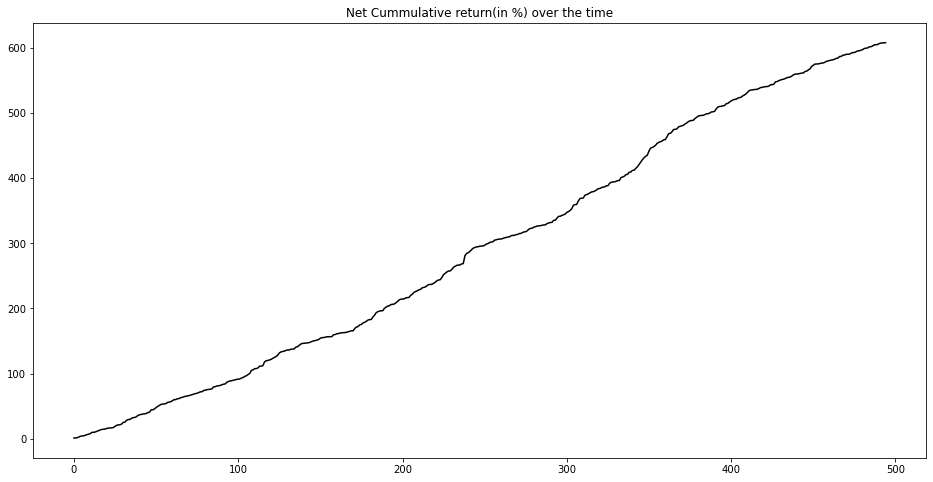

In [37]:
axis['Net_Cummulative_Returns']= abs(axis['pct_change_open_close']).cumsum()
# Reference :: https://www.investopedia.com/terms/c/cumulativereturn.asp
plt.figure(figsize=(16,8))
plt.plot(axis['Net_Cummulative_Returns'],color='black')
plt.title('Net Cummulative return(in %) over the time')
plt.show()